In [1]:
import pickle

with open('signal.p', 'rb') as f:
    sig = pickle.load(f)

In [126]:
from scipy.ndimage.interpolation import shift
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

angles = np.array([-75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
offsets = np.array([
    [-164, -82, 82, 164],
    [-160, -80, 80, 160],
    [-154, -77, 77, 154],
    [-146, -73, 73, 146],
    [-138, -69, 69, 138],
    [-130, -65, 65, 130],
    [-120, -60, 60, 120],
    [-108, -54, 54, 108],
    [-98, -49, 49, 98],
    [-84, -42, 42, 84],
    [-72, -36, 36, 72],
    [-58, -29, 29, 58],
    [-44, -22, 22, 44],
    [-30, -15, 15, 30],
    [-14, -7, 7, 14],
    [0, 0, 0, 0],
    [14, 7, -7, -14],
    [30, 15, -15, -30],
    [44, 22, -22, -44],
    [58, 29, -29, -58],
    [72, 36, -36, -72],
    [84, 42, -42, -84],
    [98, 49, -49, -98],
    [108, 54, -54, -108],
    [120, 60, -60, -120],
    [130, 65, -65, -130],
    [138, 69, -69, -138],
    [146, 73, -73, -146],
    [154, 77, -77, -154],
    [160, 80, -80, -160],
    [164, 82, -82, -164]
]);

In [128]:
def old_signals_calculation(sig, offsets):
    return np.array([np.sum(np.array([shift(channel,bias,cval=0) for (channel,bias) in zip(sig.T, offset)]).T, axis=1) for offset in offsets])

In [129]:
%timeit old_signals_calculation(sig, offsets)

17.1 s ± 77.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
def shift5(arr, num, cval=np.nan):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = cval
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = cval
        result[:num] = arr[-num:]
    else:
        result = arr
    return result

In [120]:
channels = sig.T
def calculate_signals(offsets, sig, channels):
    shifted  = np.zeros((sig.shape[1],sig.shape[0]))
    result   = np.zeros((offsets.shape[0],sig.shape[0]))
    for i in np.arange(len(offsets)):
        for j in np.arange(len(channels)):
            shifted[j] = shift5(channels[j],offsets[i][j],cval=0)
        result[i] = np.sum(shifted, axis=0)
    return result


In [121]:
def calculate_rms(data):
    return np.array([np.sqrt(np.mean(direction**2)) for direction in data])


In [122]:
%timeit calculate_signals(offsets, sig, channels)

389 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [124]:
result = calculate_signals(offsets, sig, channels)

In [125]:
%timeit calculate_rms(result)

53.6 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [138]:
rms = calculate_rms(result)

posxmax = rms.argmax()
ymax = rms[posxmax]
xmax = angles[posxmax]

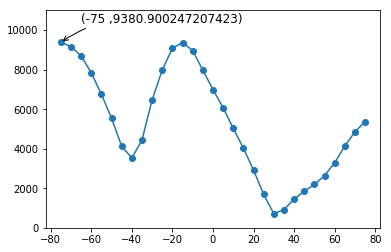

In [155]:
plt.annotate('('+str(xmax)+' ,'+str(ymax)+')',
             xy=(xmax, ymax),
             xytext=(xmax+10, ymax+1000), fontsize=12, xycoords='data',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.ylim(top=11000)
plt.plot(angles, rms, marker='o')

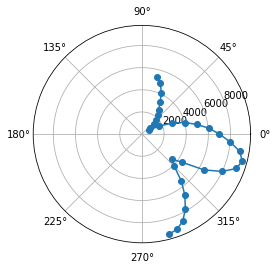

In [156]:
theta = [angle/180.0*np.pi for angle in angles]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, rms, marker='o')